In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
# For box-cox transformation
from scipy import stats

# import minmax scaling
from mlxtend.preprocessing import minmax_scaling

# Plotting modules
import seaborn as sns
import matplotlib as plt
np.random.seed(0)


Load the Datasets

In [39]:
df = pd.read_csv("../input/tesla-stock-pricing-20172022/TSLA.csv")
tesla = pd.read_csv("../input/tesla-stock-pricing-20172022/TSLA.csv")

# **About this file**

Daily price and the changes within the day can be seen here. The highest and lowest prices for every single day help in identifying patterns at the minuscule level. Volume per day is also recorded.

Load the top 5 rows of the datasets

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000


****

**Get the summary of the datasets**

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,121.335986,124.135435,118.313505,121.313569,121.313569,1.320049e+08
std,118.689726,121.405477,115.647051,118.567328,118.567328,9.025711e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,20.811667,21.127333,20.350667,20.781666,20.781666,7.542375e+07
50%,47.387333,49.579334,45.799999,48.302666,48.302666,1.016115e+08
75%,233.383331,238.436661,227.154999,233.135002,233.135002,1.526895e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


**Get the top 20 bottom of the datasets**

In [12]:
df.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
1239,2022-08-19,299.000000,300.359985,292.500000,296.666656,296.666656,61395300
1240,2022-08-22,291.913330,292.399994,286.296661,289.913330,289.913330,55843200
1241,2022-08-23,291.453339,298.826660,287.923340,296.453339,296.453339,63984900
1242,2022-08-24,297.563324,303.646667,296.500000,297.096680,297.096680,57259800
1243,2022-08-25,302.359985,302.959991,291.600006,296.070007,296.070007,53230000
1244,2022-08-26,297.429993,302.000000,287.470001,288.089996,288.089996,57163900
1245,2022-08-29,282.829987,287.739990,280.700012,284.820007,284.820007,41864700
1246,2022-08-30,287.869995,288.480011,272.649994,277.700012,277.700012,50541800
1247,2022-08-31,280.619995,281.250000,271.809998,275.609985,275.609985,52107300
1248,2022-09-01,272.579987,277.579987,266.149994,277.160004,277.160004,54287000


In [16]:
df.High.dtype

dtype('float64')

In [29]:
df["High"] = df["High"] / df["High"].max()
df.High

0       0.062664
1       0.061503
2       0.060837
3       0.060608
4       0.059494
          ...   
1254    0.737014
1255    0.717497
1256    0.738245
1257    0.745772
1258    0.732720
Name: High, Length: 1259, dtype: float64

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,0.062664,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,0.061503,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,0.060837,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,0.060608,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,0.059494,23.392000,23.406000,23.406000,122391000


In [33]:
bins = np.linspace(df.Volume.min(),df.Volume.max(),4)

In [37]:
group_names = ["High","Medium","Low"]
df["Volume"] = pd.cut(df.Volume,bins,labels = group_names,include_lowest = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,NaN,25.178667,25.666668,25.666668,High
1,2017-09-19,25.333332,NaN,24.904667,25.006666,25.006666,High
2,2017-09-20,24.866667,NaN,24.738001,24.927334,24.927334,High
3,2017-09-21,24.993334,NaN,24.300667,24.431999,24.431999,High
4,2017-09-22,24.432667,NaN,23.392000,23.406000,23.406000,High


In [40]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000


In [41]:
tesla.High

0        25.974001
1        25.492666
2        25.216667
3        25.122000
4        24.660000
           ...    
1254    305.489990
1255    297.399994
1256    306.000000
1257    309.119995
1258    303.709991
Name: High, Length: 1259, dtype: float64

In [42]:
tesla.High.max()

414.496674

In [43]:
tesla.High.min()

12.445333

Text(0.5, 1.0, 'High Prices')

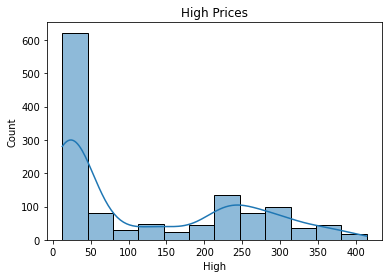

In [44]:
high_prices = tesla.High
ax = sns.histplot(high_prices,kde = True)
ax.set_title("High Prices")

In [45]:
tesla.High = (tesla.High - tesla.High.mean()) / tesla.High.std()
tesla.High

0      -0.808542
1      -0.812507
2      -0.814780
3      -0.815560
4      -0.819365
          ...   
1254    1.493792
1255    1.427156
1256    1.497993
1257    1.523692
1258    1.479131
Name: High, Length: 1259, dtype: float64

Text(0.5, 1.0, 'Normalised Prices')

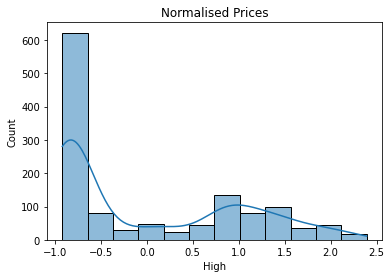

In [49]:
normalised_prices = tesla.High
ax = sns.histplot(normalised_prices, kde = True)
ax.set_title("Normalised Prices")